# Sentiment Analysis with DistilBERT using Hugging Face
 NLP with Hugging Face


## What is Sentiment Analysis?
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

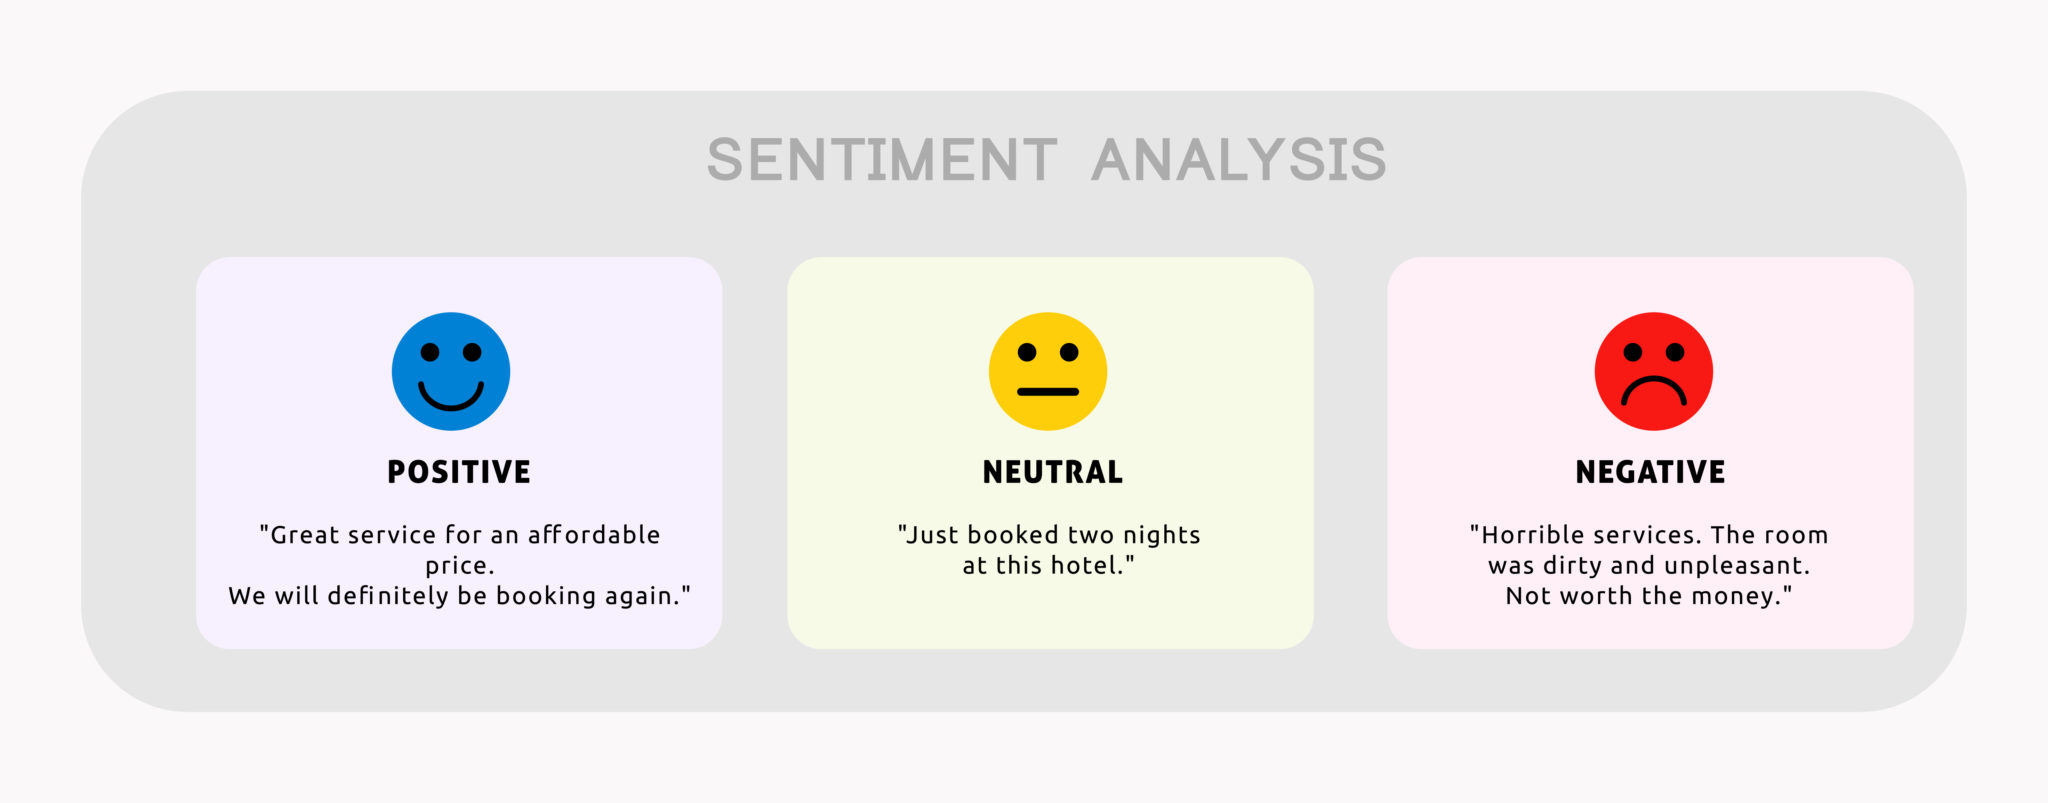

### Transformers Architecture
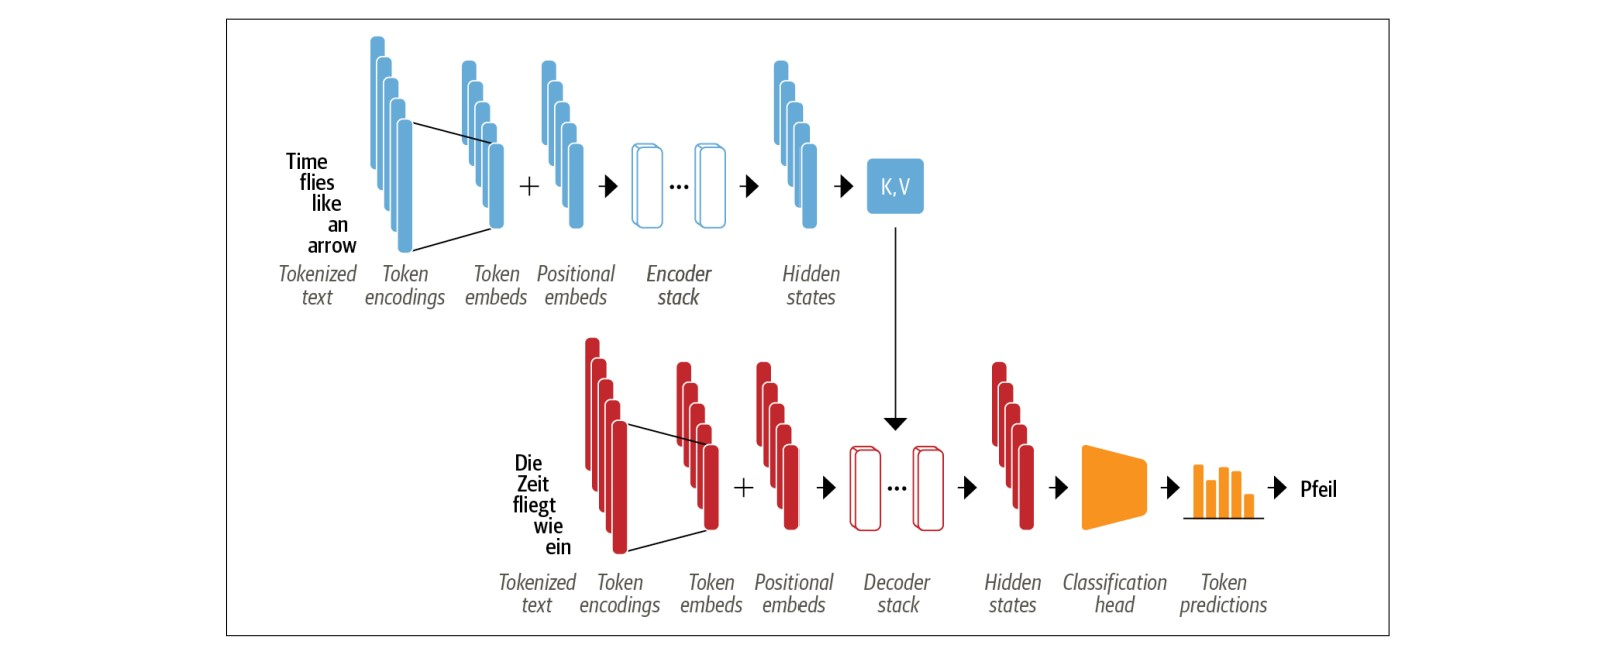

## DistilBERT
- The IMDB dataset contains 25,000 movie reviews labeled by sentiment for training a model and 25,000 movie reviews for testing it.

- DistilBERT is a smaller, faster and cheaper version of BERT. It has 40% smaller than BERT and runs 60% faster while preserving over 95% of BERT’s performance.

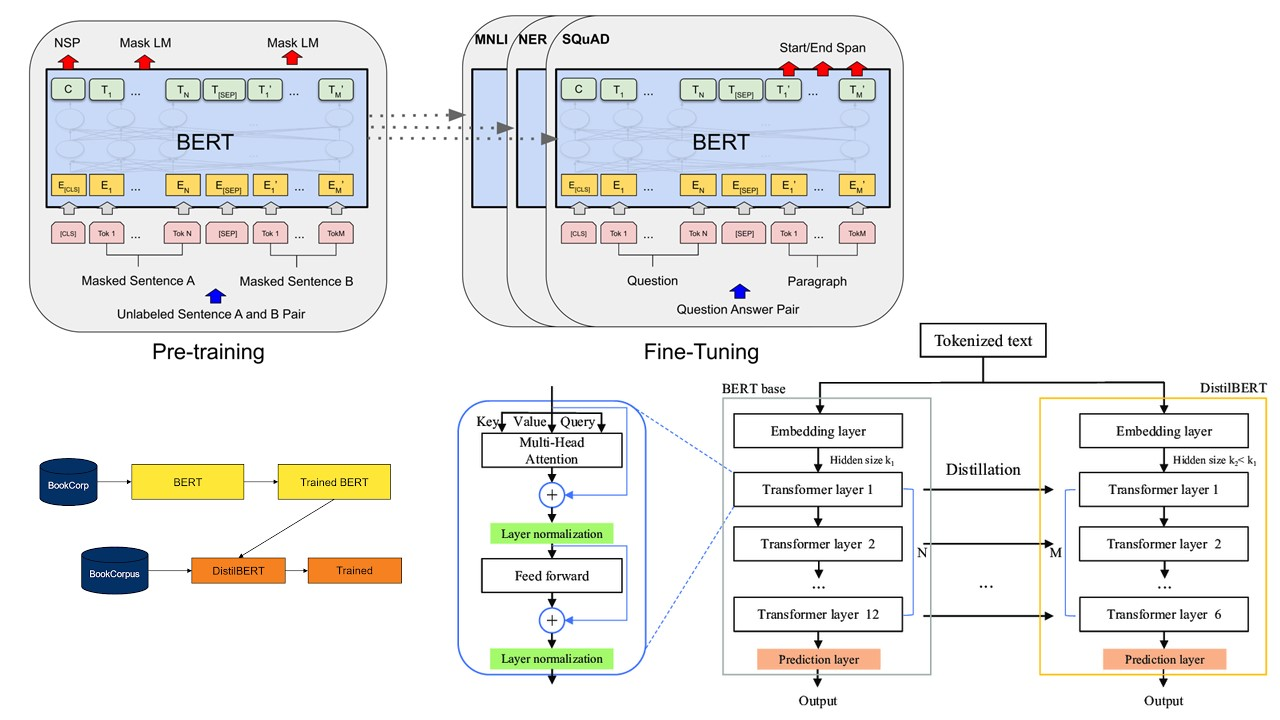

**Introduction to DistilBERT:** DistilBERT, short for "Distill and BERT," is a compact version of the renowned BERT (Bidirectional Encoder Representations from Transformers) model.

**Model Architecture:** It reduces the number of layers and attention heads, resulting in a smaller and faster model.

**Parameter Reduction:** One of DistilBERT's key features is its parameter reduction strategy, achieved by distillation. This involves training the model on a combination of teacher (BERT) and student (DistilBERT).

**Efficiency and Speed:** By reducing the model's size and complexity, DistilBERT achieves a significant speedup during both training and inference.

# Coding

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 14.0 MB/s eta 0:00:00
     ━━━

In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install mlxtend
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

2023-12-24 15:16:28.321543: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 15:16:28.321605: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 15:16:28.323527: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-24 15:16:28.347581: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-24 15:16:30.437147: W tensorflow/comp

In [3]:
# sentiment analysis with the pipeline
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

data = ['i love you', 'i hate you']
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

## Data Loading and Preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [7]:
df = pd.read_csv("/content/IMDB-Dataset.csv")
df = df.sample(10_000)
df.head()

review sentiment
27423  I bought this from Blockbuster for 99p. The gu...  negative
41864  <br /><br />Have you ever felt like your being...  positive
39114  I had my son for the weekend and my parent's c...  positive
11408  I saw this movie in the Rotterdam Film Festiva...  positive
48800  The Three Stooges in a feature length western ...  negative

In [8]:
df.shape
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
# preprocessing
df['word_counts'] = df['review'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts'] = df['review'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength'] = df['review'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts'] = df['review'].apply(lambda x: ps.get_stopwords_counts(x))

In [10]:
df.head()

df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


<Axes: >

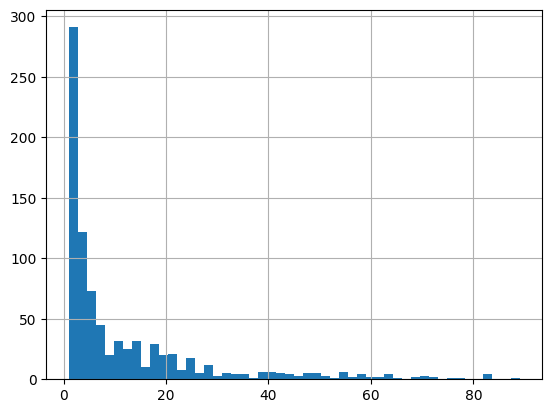

In [11]:
df['word_counts'].value_counts().hist(bins=50)

## Data Preparation for ML

In [ ]:
# custom dataset -> evaluation/compute metrics -> training arguments -> trainer -> training -> testing

In [12]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [13]:
class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=512):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length",
                              max_length=self.max_len)

    return {
        'input_ids': encoding['input_ids'],
        'attention_mask': encoding['attention_mask'],
        'labels': label
    }


In [14]:
# prepare tokenizer and model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = 'distilbert-base-uncased'
device = "cuda"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2).to(device)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
X = df['review'].tolist()

label2id = {'positive': 1, 'negative': 0}
id2label = {1: 'positive', 0: 'negative'}

y = df['sentiment'].map(label2id).tolist()

dataset = CustomDataset(X, y, tokenizer)

In [16]:
dataset[0].keys()

dict_keys(['input_ids', 'attention_mask', 'labels'])

In [17]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(example):
  labels = example.label_ids
  preds = example.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {'accuracy': acc, "f1": f1}

In [19]:
from transformers import Trainer, TrainingArguments
batch_size = 16
model_name = "distilbert_finetuned_setiment"

args = TrainingArguments(
    output_dir = "output",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size = batch_size,
    learning_rate = 2e-5,
    num_train_epochs = 1,
    evaluation_strategy = 'epoch'
)

In [20]:
trainer = Trainer(model=model,
                  args=args,
                  train_dataset = train_dataset,
                  eval_dataset = test_dataset,
                  compute_metrics=compute_metrics,
                  tokenizer = tokenizer)

In [21]:
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


TrainOutput(global_step=500, training_loss=0.30264279174804687, metrics={'train_runtime': 425.4618, 'train_samples_per_second': 18.803, 'train_steps_per_second': 1.175, 'total_flos': 1059739189248000.0, 'train_loss': 0.30264279174804687, 'epoch': 1.0})

In [22]:
trainer.save_model(model_name)

## Model Testing

In [23]:
text = "i love this product"
pipe = pipeline('text-classification', model_name)
pipe(text)

[{'label': 'LABEL_1', 'score': 0.9472419619560242}]

In [24]:
id2label

{1: 'positive', 0: 'negative'}

In [25]:
tok = AutoTokenizer.from_pretrained(model_name)
mod = AutoModelForSequenceClassification.from_pretrained(model_name)

In [26]:
def get_prediction(text):
  input_ids = tok.encode(text, return_tensors='pt')
  output = mod(input_ids)

  preds = torch.nn.functional.softmax(output.logits, dim=-1)

  prob = torch.max(preds).item()

  idx = torch.argmax(preds).item()
  sentiment = id2label[idx]

  return {'sentiment':sentiment, 'prob':prob}

In [27]:
text = "i love this product"
get_prediction(text)

{'sentiment': 'positive', 'prob': 0.9472419619560242}

In [28]:
text = "i hate this product"
get_prediction(text)

{'sentiment': 'negative', 'prob': 0.8969853520393372}

In [29]:
text = "the product is valuable to our need. it is very useful for our purpose but bit costly."
get_prediction(text)

{'sentiment': 'positive', 'prob': 0.803313672542572}

In [30]:
text = "the product is valuable to our need. it is very useful for our purpose but very costly."
get_prediction(text)

{'sentiment': 'positive', 'prob': 0.8174880743026733}

In [31]:
text = "the product is less valuable to our need. it is very useful for our purpose but bit costly."
get_prediction(text)

{'sentiment': 'negative', 'prob': 0.649201512336731}